
# Covid-19 Overview in Greece

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [New cases graph](#new_cases_graph)
* [New deaths graph](#new_deaths_graph)
* [Total cases graph](#total_cases_graph)
* [Total deaths graph](#total_deaths_graph)
* [Prediction of total cases](#prediction_total_cases)
* [Prediction of total deaths](#prediction_total_deaths)
* [Prediction of new deaths](#prediction_new_deaths)
* [Prediction of new cases](#prediction_new_cases)

# Introduction <a name="introduction"></a>



## Data <a name="data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy
import plotly
import folium
from folium import plugins
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
import plotly.express as px
import plotly.graph_objects as go
import os

In [2]:
!wget -nv https://covid19.who.int/WHO-COVID-19-global-data.csv
print('File downloaded!')
file_name=('WHO-COVID-19-global-data.csv')
df_raw=pd.read_csv(file_name)
print('File copied to DataFrame!')
os.remove("WHO-COVID-19-global-data.csv")
print("File Removed!")

File downloaded!
File copied to DataFrame!
File Removed!


2020-12-15 22:25:00 URL:https://covid19.who.int/WHO-COVID-19-global-data.csv [3492196/3492196] -> "WHO-COVID-19-global-data.csv" [1]


In [3]:
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


#### Removing data from all the countries except Greece

In [4]:
df_raw=df_raw[df_raw['Country'].str.contains('Greece')]
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28188,2020-01-03,GR,Greece,EURO,0,0,0,0
28189,2020-01-04,GR,Greece,EURO,0,0,0,0
28190,2020-01-05,GR,Greece,EURO,0,0,0,0
28191,2020-01-06,GR,Greece,EURO,0,0,0,0
28192,2020-01-07,GR,Greece,EURO,0,0,0,0


#### Removing unnecessary data columns

In [5]:
df_raw=df_raw.drop(columns=["Country_code", "WHO_region", "Country"])
df_raw.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28188,2020-01-03,0,0,0,0
28189,2020-01-04,0,0,0,0
28190,2020-01-05,0,0,0,0
28191,2020-01-06,0,0,0,0
28192,2020-01-07,0,0,0,0


#### Renaming columns

In [6]:
df_raw=df_raw.rename(columns={"Cumulative_cases": "Total_cases", "Cumulative_deaths": "Total_deaths"})
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28188,2020-01-03,0,0,0,0
28189,2020-01-04,0,0,0,0
28190,2020-01-05,0,0,0,0
28191,2020-01-06,0,0,0,0
28192,2020-01-07,0,0,0,0


#### Sorting the dataframe by Date

In [7]:
df_raw=df_raw.sort_values(by='Date_reported', ascending=False)
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28535,2020-12-15,639,125173,62,3687
28534,2020-12-14,692,124534,85,3625
28533,2020-12-13,1194,123842,68,3540
28532,2020-12-12,1395,122648,102,3472
28531,2020-12-11,1533,121253,81,3370


#### Converting 'Date_reported' to datetime

In [8]:
df_raw.Date_reported = pd.to_datetime(df_raw.Date_reported).dt.date

In [9]:
df_raw.head(10)

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28535,2020-12-15,639,125173,62,3687
28534,2020-12-14,692,124534,85,3625
28533,2020-12-13,1194,123842,68,3540
28532,2020-12-12,1395,122648,102,3472
28531,2020-12-11,1533,121253,81,3370
28530,2020-12-10,1675,119720,95,3289
28529,2020-12-09,1324,118045,102,3194
28528,2020-12-08,1250,116721,89,3092
28527,2020-12-07,903,115471,101,3003
28526,2020-12-06,1383,114568,98,2902


#### Correcting the deviation of the day

In [10]:
df_copy = df_raw.copy()
df_copy['Date_reported']=df_copy['Date_reported'].shift(-1)
df_copy.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28535,2020-12-14,639,125173,62,3687
28534,2020-12-13,692,124534,85,3625
28533,2020-12-12,1194,123842,68,3540
28532,2020-12-11,1395,122648,102,3472
28531,2020-12-10,1533,121253,81,3370


In [11]:
df_copy = df_copy.iloc[:-310]

In [12]:
df_copy=df_copy.sort_values(by='Total_cases', ascending=True)

In [13]:
df_copy.style.background_gradient(cmap='Reds')

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28498,2020-11-07,2555,54809,34,749
28499,2020-11-08,1889,56698,35,784
28500,2020-11-09,1489,58187,41,825
28501,2020-11-10,2383,60570,41,866
28502,2020-11-11,2751,63321,43,909
28503,2020-11-12,3316,66637,50,959
28504,2020-11-13,3038,69675,38,997
28505,2020-11-14,2835,72510,38,1035
28506,2020-11-15,1695,74205,71,1106
28507,2020-11-16,2198,76403,59,1165


# New cases graph<a name="new_cases_graph"></a>

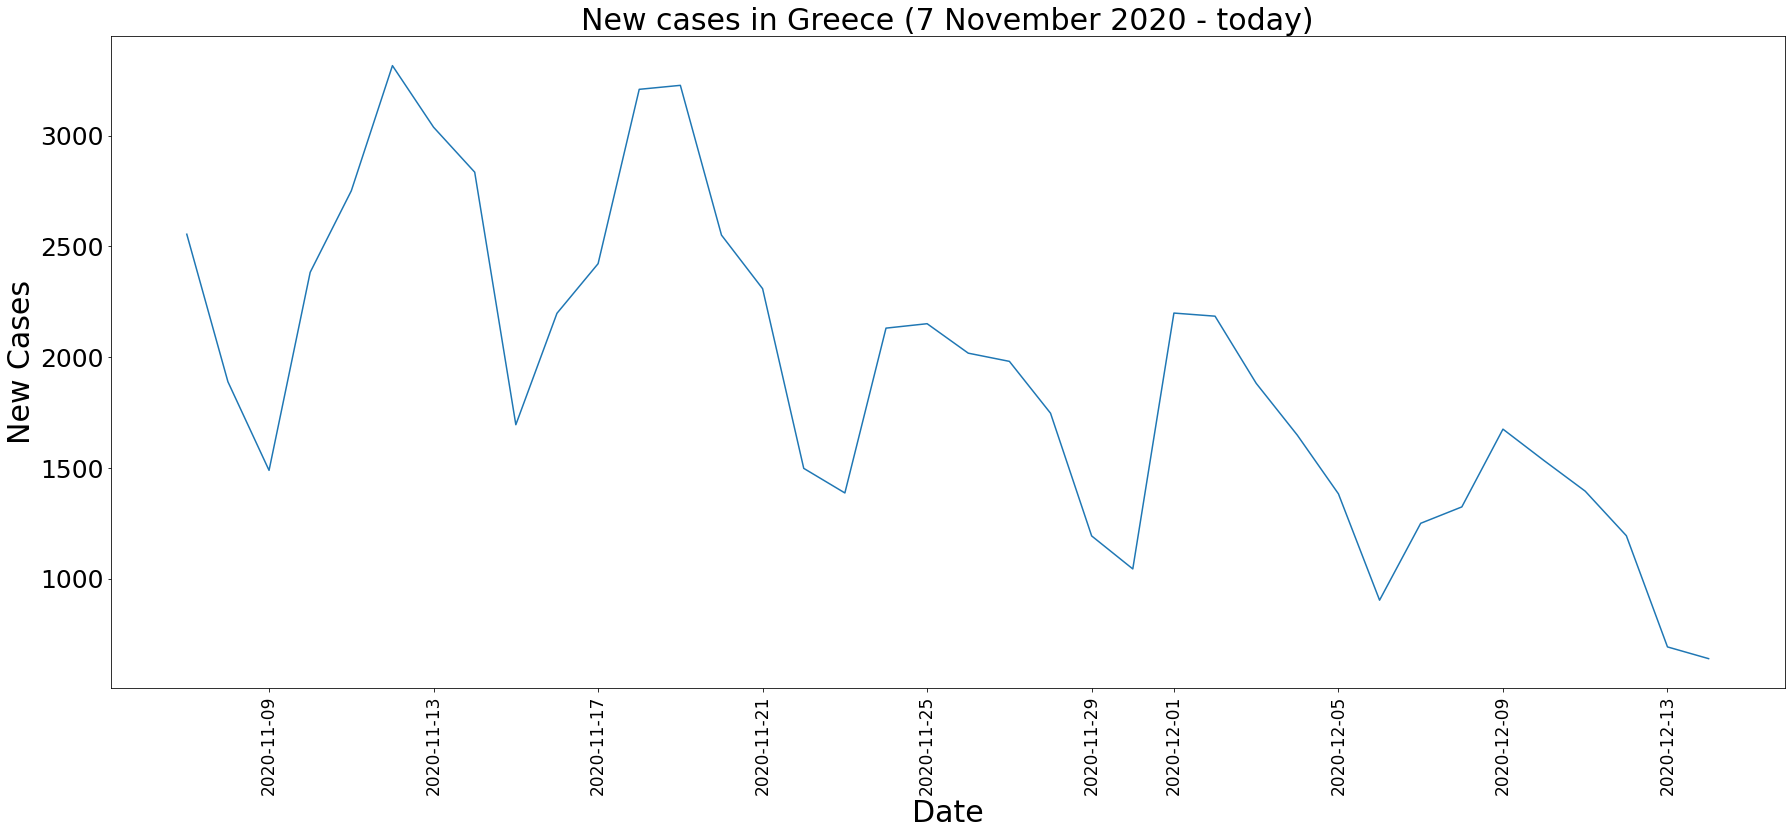

In [14]:
plt.figure(figsize=(30,12))
plt.title('New cases in Greece (7 November 2020 - today)', fontsize=30)
plt.ylabel('New Cases', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['New_cases'])

# New deaths graph<a name="new_deaths_graph"></a>

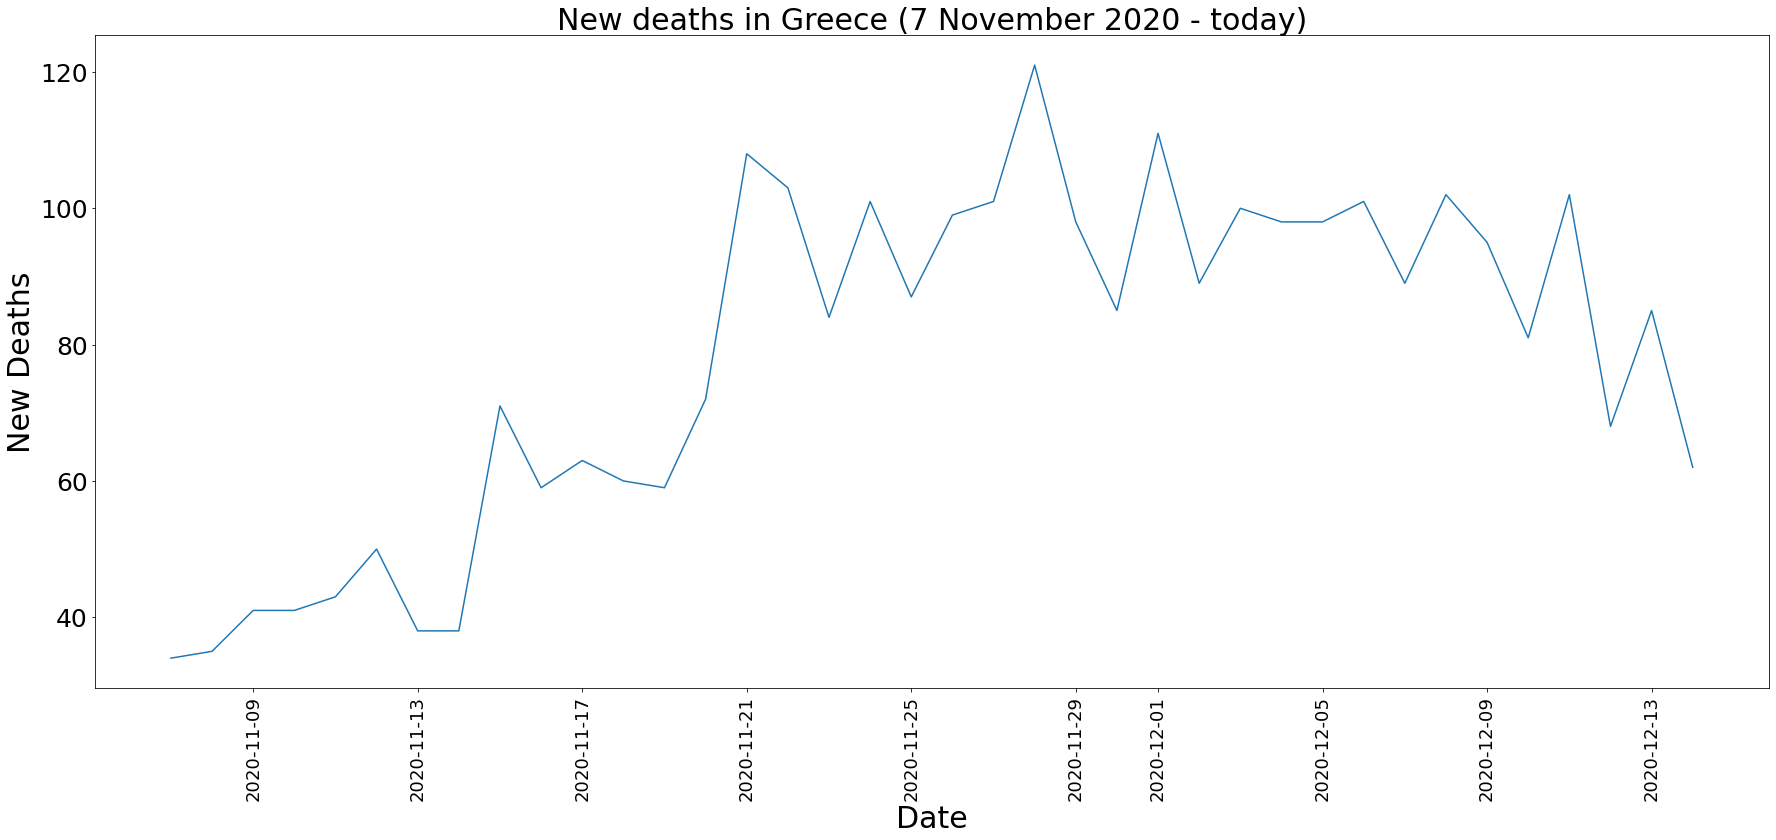

In [15]:
plt.figure(figsize=(30,12))
plt.title('New deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('New Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=18)
plt.plot(df_copy['Date_reported'], df_copy['New_deaths'])

# Total cases graph<a name="total_cases_graph"></a>

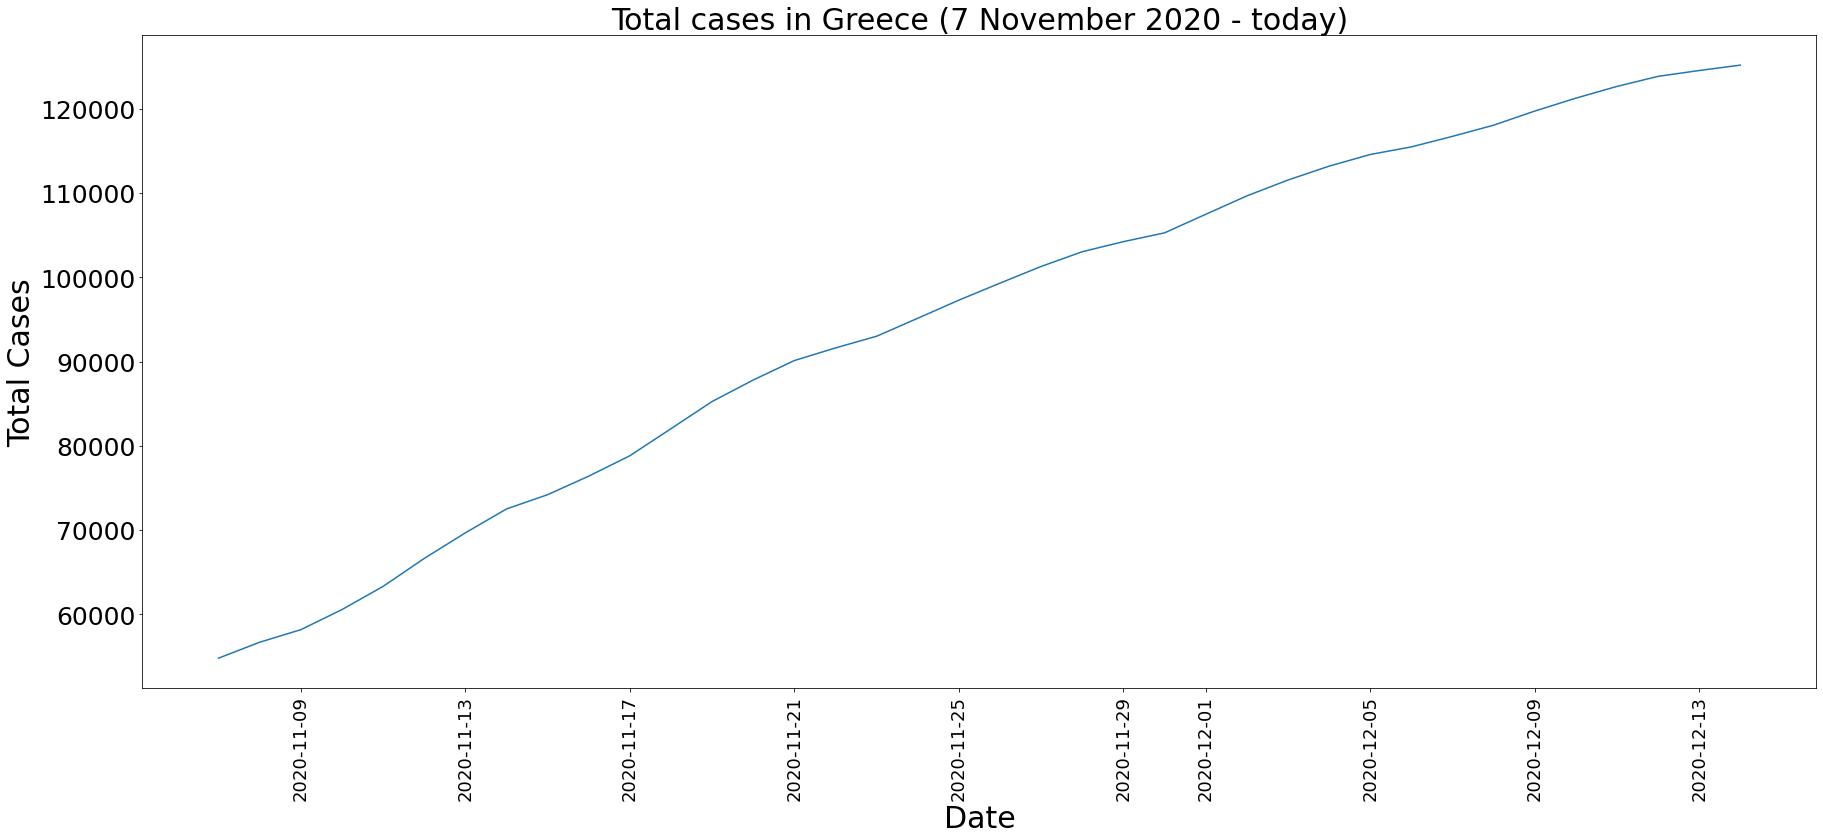

In [16]:
plt.figure(figsize=(30,12))
plt.title('Total cases in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_cases'])

# Total deaths graph<a name="total_deaths_graph"></a>

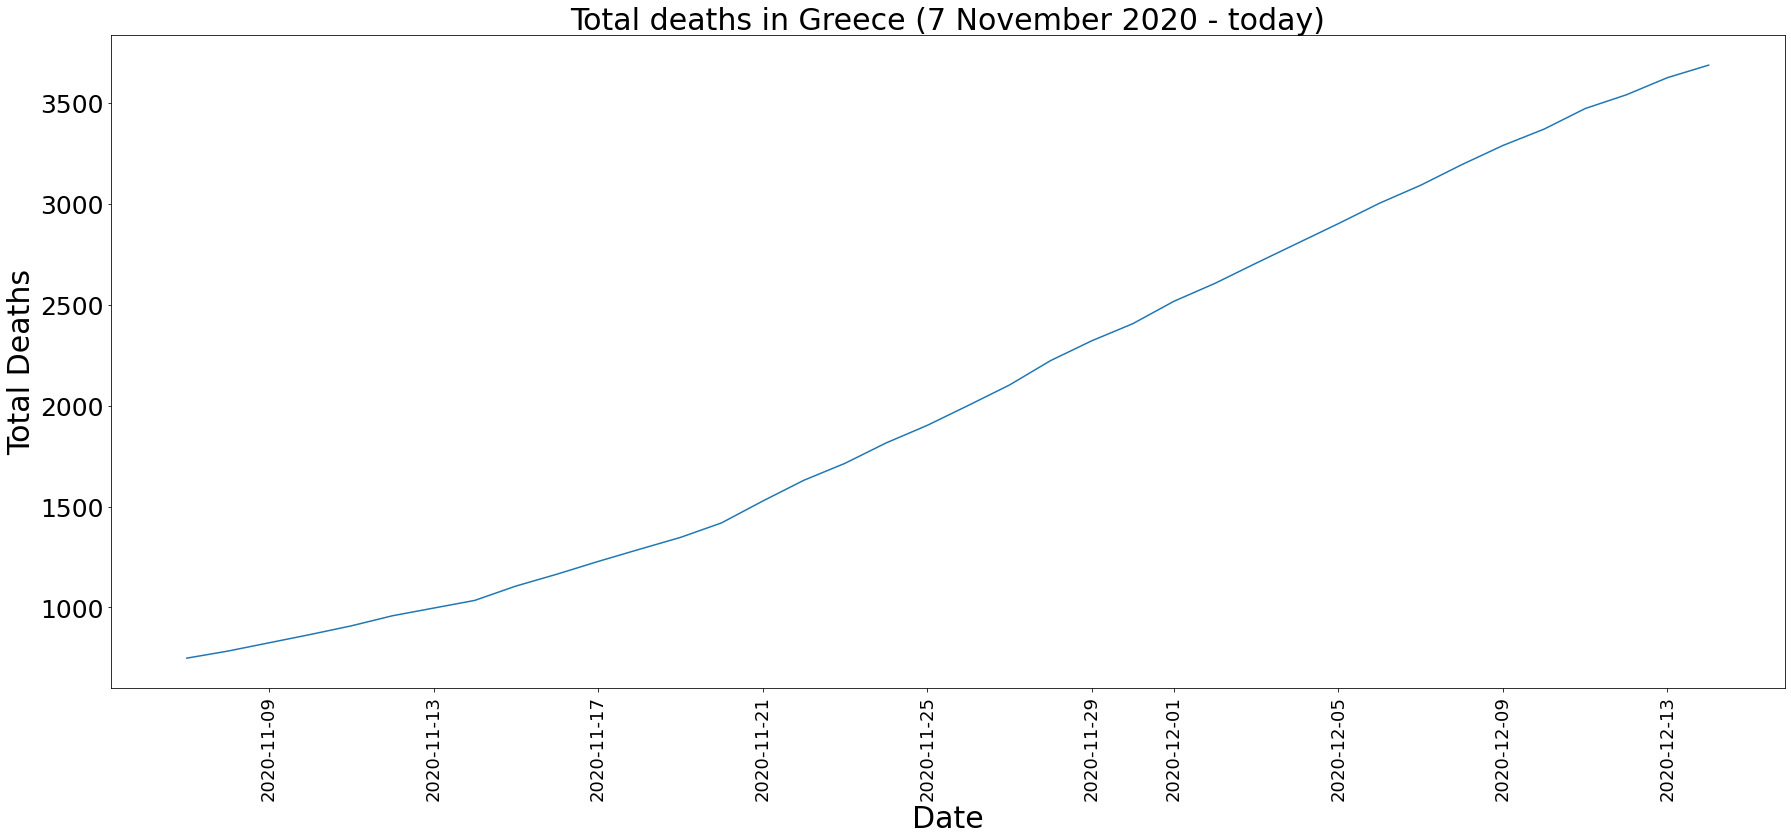

In [17]:
plt.figure(figsize=(30,12))
plt.title('Total deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_deaths'])

## Using Prophet to predict covid-19 behavior to 1 week from today

In [18]:
from fbprophet import Prophet

In [19]:
new_cases=df_copy.groupby('Date_reported').sum()['New_cases'].reset_index()
new_deaths=df_copy.groupby('Date_reported').sum()['New_deaths'].reset_index()
total_cases=df_copy.groupby('Date_reported').sum()['Total_cases'].reset_index()
total_deaths=df_copy.groupby('Date_reported').sum()['Total_deaths'].reset_index()

## Prediction of Total Cases<a name="prediction_total_cases"></a>

In [20]:
total_cases.tail()

,Date_reported,Total_cases
33,2020-12-10,121253
34,2020-12-11,122648
35,2020-12-12,123842
36,2020-12-13,124534
37,2020-12-14,125173


In [21]:
total_cases.columns=['ds','y']

In [22]:
m=Prophet(interval_width=0.95)
m.fit(total_cases)
future_total_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
forecast_total_cases=m.predict(future_total_cases)
forecast_total_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
38,2020-12-15,126852.114632,126560.984328,127110.950321
39,2020-12-16,128468.841866,127821.406290,129077.846079
40,2020-12-17,130086.569101,128911.147473,131156.007717
41,2020-12-18,131466.152905,129793.935700,133056.505775


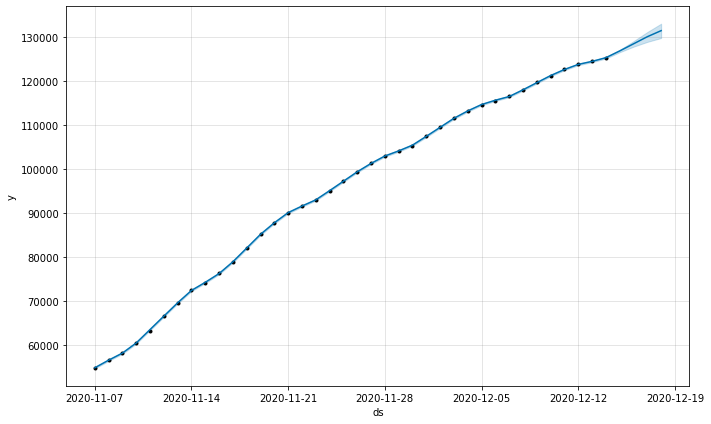

In [24]:
forecast_total_cases_plot=m.plot(forecast_total_cases)

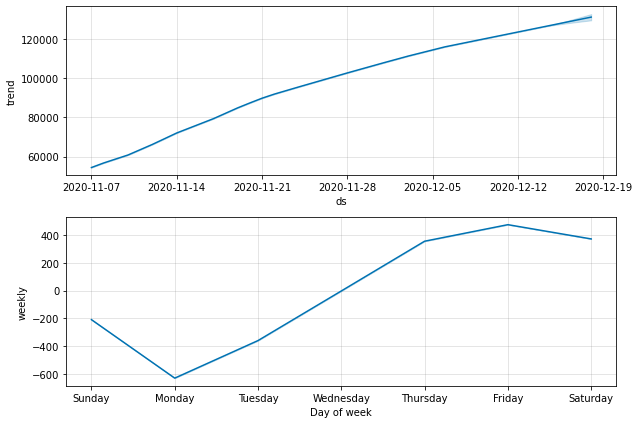

In [25]:
forecast_total_cases_plot=m.plot_components(forecast_total_cases)

## Prediction of total deaths<a name="prediction_total_deaths"></a>

In [26]:
total_deaths.tail()

,Date_reported,Total_deaths
33,2020-12-10,3370
34,2020-12-11,3472
35,2020-12-12,3540
36,2020-12-13,3625
37,2020-12-14,3687


In [27]:
total_deaths.columns=['ds','y']

In [28]:
m=Prophet(interval_width=0.95)
m.fit(total_deaths)
future_total_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
forecast_total_deaths=m.predict(future_total_deaths)
forecast_total_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
38,2020-12-15,3806.629497,3791.384184,3821.128475
39,2020-12-16,3891.862020,3874.044203,3911.101851
40,2020-12-17,3980.094543,3951.970148,4008.416138
41,2020-12-18,4068.772627,4027.385392,4104.069218


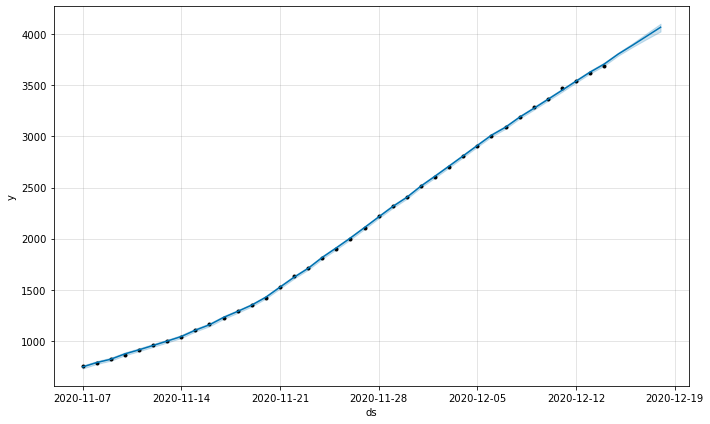

In [30]:
forecast_total_deaths_plot=m.plot(forecast_total_deaths)

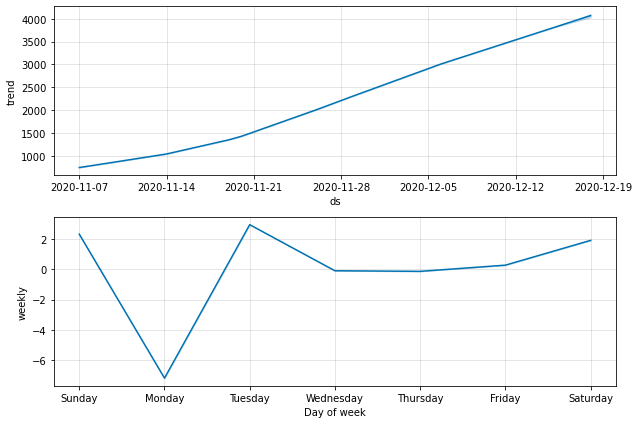

In [31]:
forecast_total_deaths_plot=m.plot_components(forecast_total_deaths)

## Prediction of new deaths <a name="prediction_new_deaths"></a>

In [32]:
new_deaths.tail()

,Date_reported,New_deaths
33,2020-12-10,81
34,2020-12-11,102
35,2020-12-12,68
36,2020-12-13,85
37,2020-12-14,62


In [33]:
new_deaths.columns=['ds','y']

In [34]:
m=Prophet(interval_width=0.95)
m.fit(new_deaths)
future_new_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
forecast_new_deaths=m.predict(future_new_deaths)
forecast_new_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
38,2020-12-15,116.298073,80.901495,147.488517
39,2020-12-16,107.468960,74.247380,140.772977
40,2020-12-17,110.470621,74.457069,145.209633
41,2020-12-18,114.876112,82.133289,149.078071


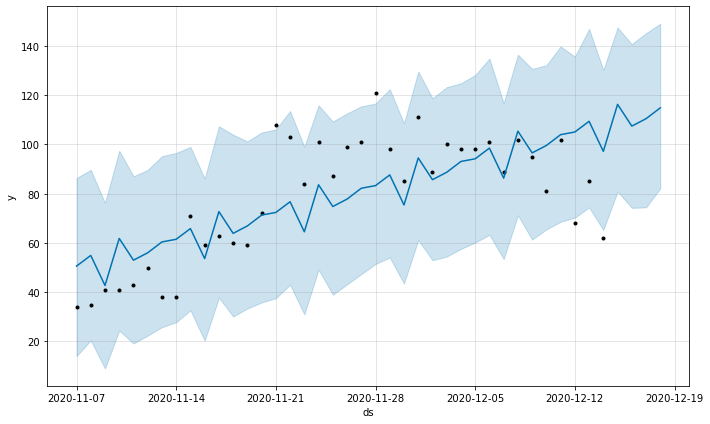

In [36]:
forecast_new_deaths_plot=m.plot(forecast_new_deaths)

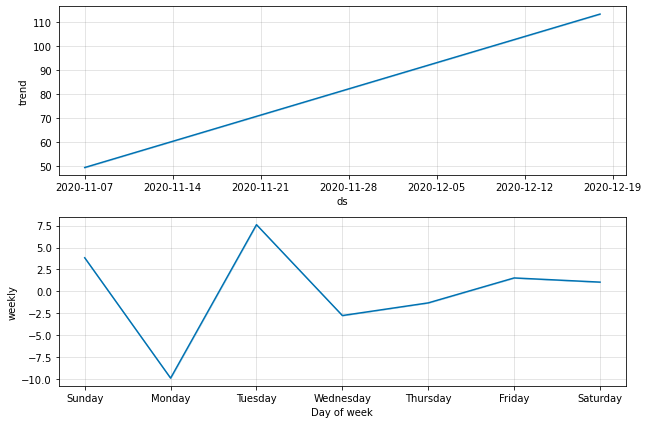

In [37]:
forecast_new_deaths_plot=m.plot_components(forecast_new_deaths)

## Prediction of new cases<a name="prediction_new_cases"></a>

In [38]:
new_cases.tail()

,Date_reported,New_cases
33,2020-12-10,1533
34,2020-12-11,1395
35,2020-12-12,1194
36,2020-12-13,692
37,2020-12-14,639


In [39]:
new_cases.columns=['ds','y']

In [40]:
m=Prophet(interval_width=0.95)
m.fit(new_cases)
future_new_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
forecast_new_cases=m.predict(future_new_cases)
forecast_new_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
38,2020-12-15,1167.394498,672.897166,1691.835302
39,2020-12-16,1469.819999,959.491153,1992.272161
40,2020-12-17,1470.837161,948.669445,1990.816654
41,2020-12-18,1198.246769,677.200563,1735.562593


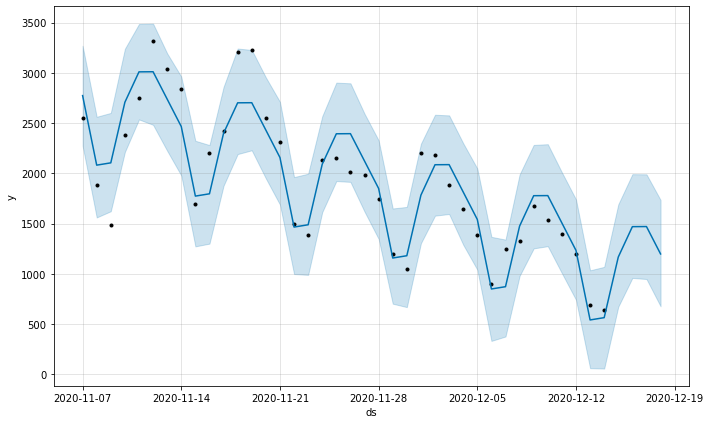

In [42]:
forecast_new_cases_plot=m.plot(forecast_new_cases)

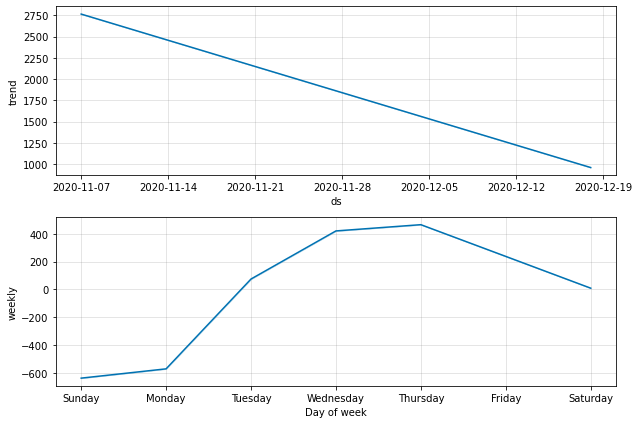

In [43]:
forecast_new_cases_plot=m.plot_components(forecast_new_cases)